# Question 1

### Plot the indices

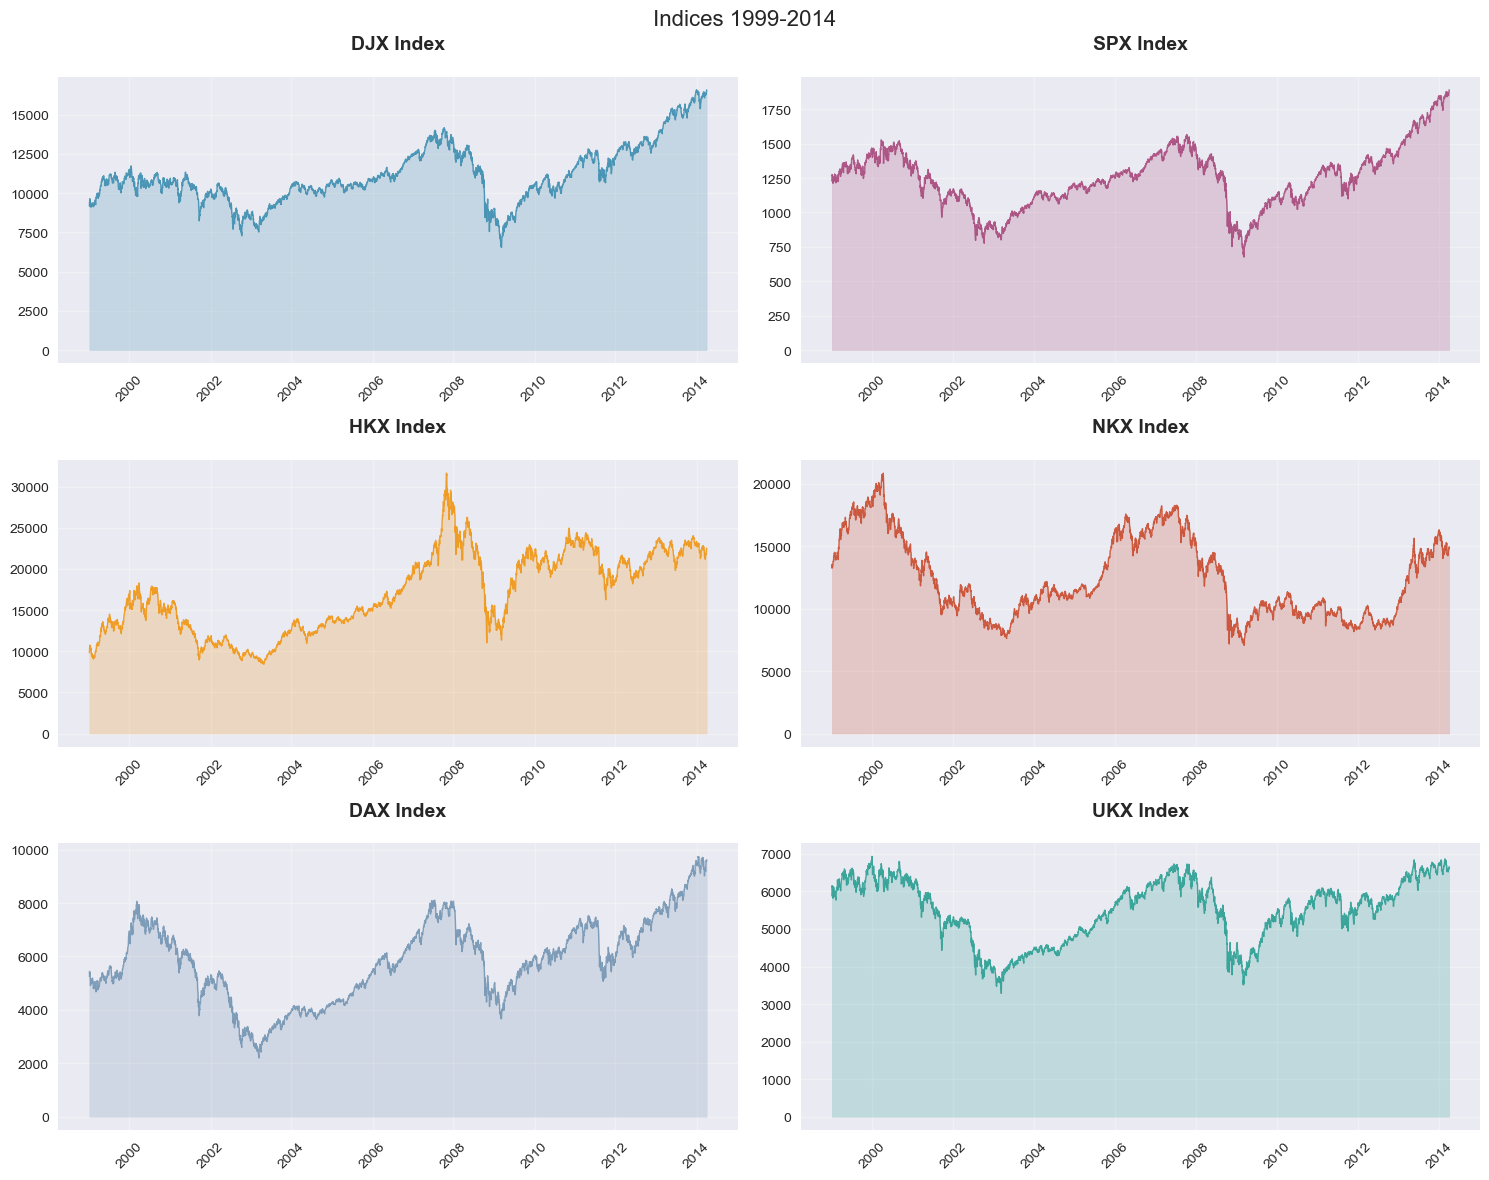

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8')

indices = pd.read_csv('/Users/mikhailkozyrev/Downloads/stockindices.csv')
indices['Date'] = pd.to_datetime(indices['Date'], format='%m/%d/%y')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#1B998B']

for idx, column in enumerate(indices.columns[1:]):
    axes[idx].plot(
        indices['Date'], 
        indices[column], 
        color=colors[idx], 
        linewidth=1,
        alpha=0.8
    )
    
    axes[idx].fill_between(indices['Date'], indices[column], 
                          alpha=0.2, 
                          color=colors[idx])
    
    axes[idx].set_title(f"{column} Index", 
                       fontsize=14, 
                       fontweight='bold', 
                       pad=20)
    
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Indices 1999-2014', fontsize=16)
plt.tight_layout()
plt.show()

### Compute daily logarithmic and simple returns

In [179]:
for column in ['DJX','SPX',	'HKX','NKX','DAX','UKX']:
    indices[column + '_simple_return'] = indices[column].pct_change()
    
for column in ['DJX','SPX',	'HKX','NKX','DAX','UKX']:
    indices[column + '_log_return'] = np.log(indices[column]) - np.log(indices[column].shift(1))
indices


,Date,DJX,SPX,HKX,NKX,DAX,UKX,DJX_simple_return,SPX_simple_return,HKX_simple_return,NKX_simple_return,DAX_simple_return,UKX_simple_return,DJX_log_return,SPX_log_return,HKX_log_return,NKX_log_return,DAX_log_return,UKX_log_return
0,1999-01-04,9184.26,1228.10,9809.17,13415.89,5252.36,5879.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-05,9311.19,1244.78,9891.06,13232.74,5253.91,5958.20,0.013820,0.013582,0.008348,-0.013652,0.000295,0.013403,0.013726,0.013491,0.008314,-0.013746,0.000295,0.013314
2,1999-01-06,9544.97,1272.34,10233.80,13468.46,5443.62,6148.80,0.025107,0.022140,0.034651,0.017813,0.036108,0.031990,0.024797,0.021899,0.034065,0.017657,0.035472,0.031489
3,1999-01-07,9537.76,1269.73,10693.57,13536.56,5323.21,6101.20,-0.000755,-0.002051,0.044927,0.005056,-0.022119,-0.007741,-0.000756,-0.002053,0.043947,0.005044,-0.022368,-0.007771
4,1999-01-08,9643.32,1275.09,10722.70,13391.81,5392.84,6147.20,0.011068,0.004221,0.002724,-0.010693,0.013080,0.007540,0.011007,0.004212,0.002720,-0.010751,0.012996,0.007511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2014-03-27,16264.23,1849.04,21834.45,14622.89,9451.21,6588.32,-0.000293,-0.001900,-0.002435,0.010066,0.000278,-0.002571,-0.000293,-0.001902,-0.002438,0.010016,0.000278,-0.002574
3974,2014-03-28,16323.06,1857.62,22065.53,14696.03,9587.19,6615.58,0.003617,0.004640,0.010583,0.005002,0.014388,0.004138,0.003611,0.004630,0.010528,0.004989,0.014285,0.004129
3975,2014-03-31,16457.66,1872.34,22151.06,14827.83,9555.91,6598.37,0.008246,0.007924,0.003876,0.008968,-0.003263,-0.002601,0.008212,0.007893,0.003869,0.008928,-0.003268,-0.002605
3976,2014-04-01,16532.61,1885.52,22448.54,14791.99,9603.71,6652.61,0.004554,0.007039,0.013430,-0.002417,0.005002,0.008220,0.004544,0.007015,0.013340,-0.002420,0.004990,0.008187


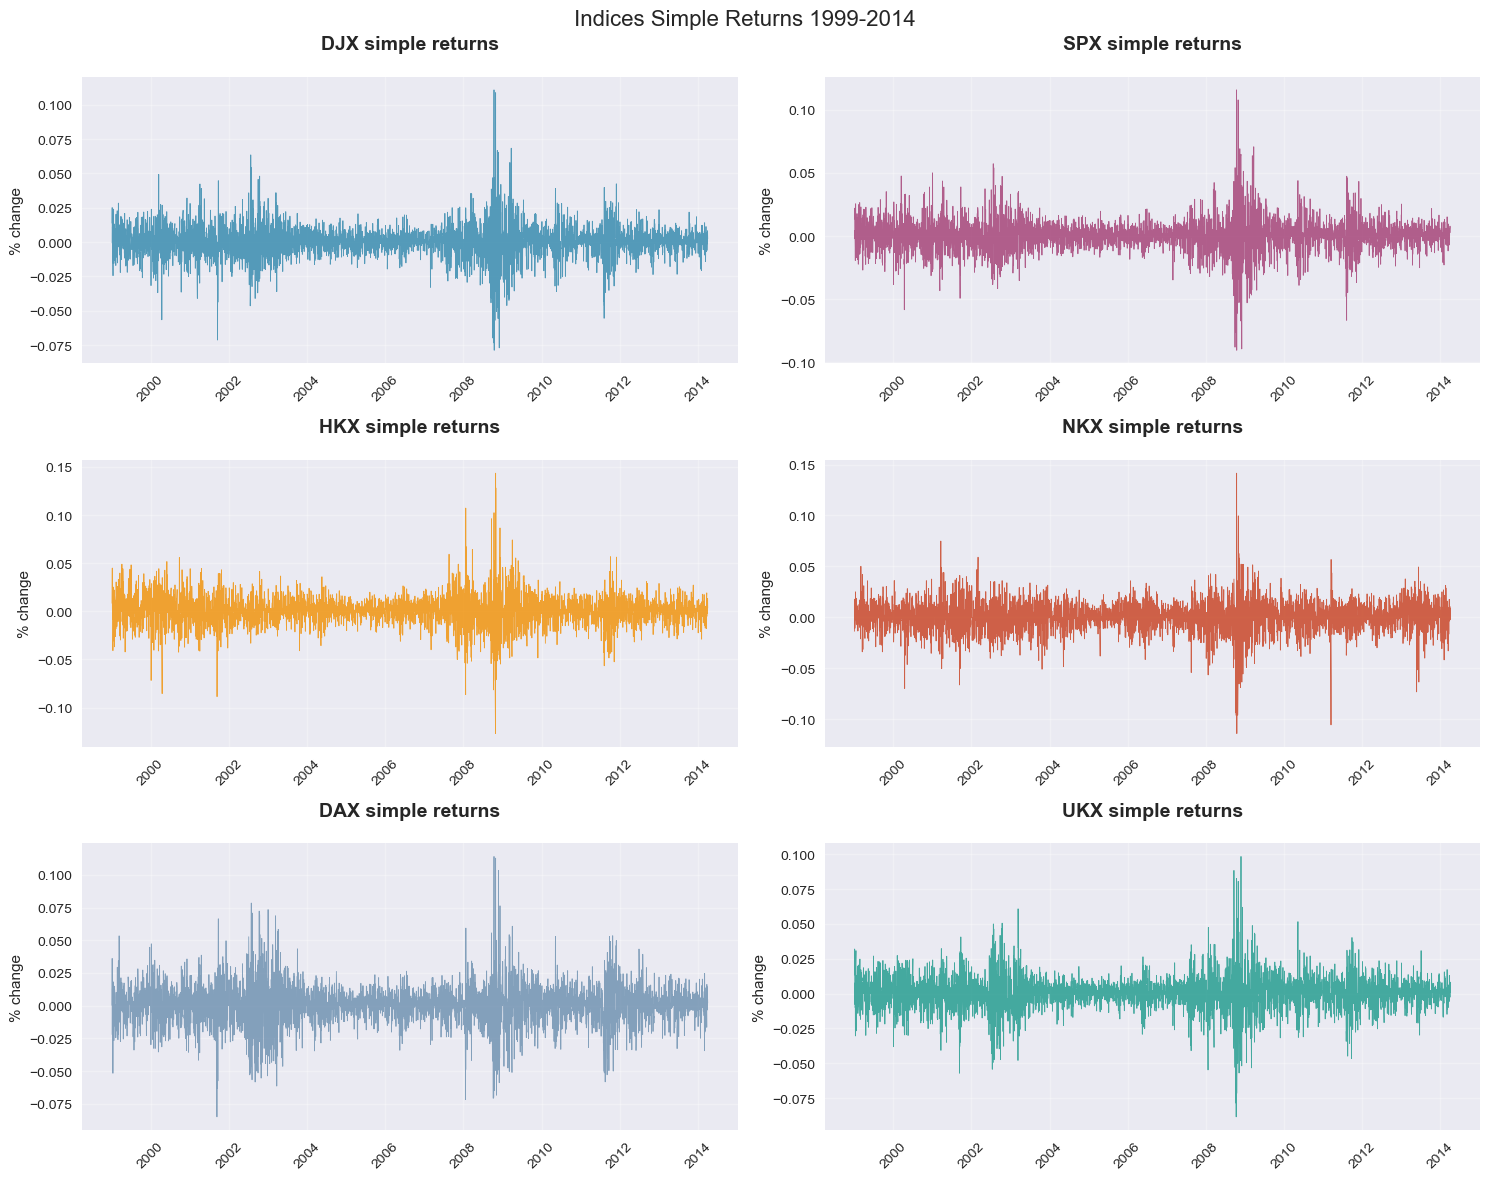

In [183]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
axes = axes.flatten()

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#1B998B']

for idx, column in enumerate(indices.loc[:,'DJX_simple_return':'UKX_simple_return'].columns):
    axes[idx].plot(
        indices['Date'],
        indices[column], 
        color=colors[idx],
        linewidth=0.6,
        alpha=0.8
    )

    axes[idx].set_title(
        f"{column[:3]} simple returns",
        fontsize=14, 
        fontweight='bold', 
        pad=20
    )
    axes[idx].set_ylabel('% change')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Indices Simple Returns 1999-2014', fontsize=16)
plt.tight_layout()
plt.show()


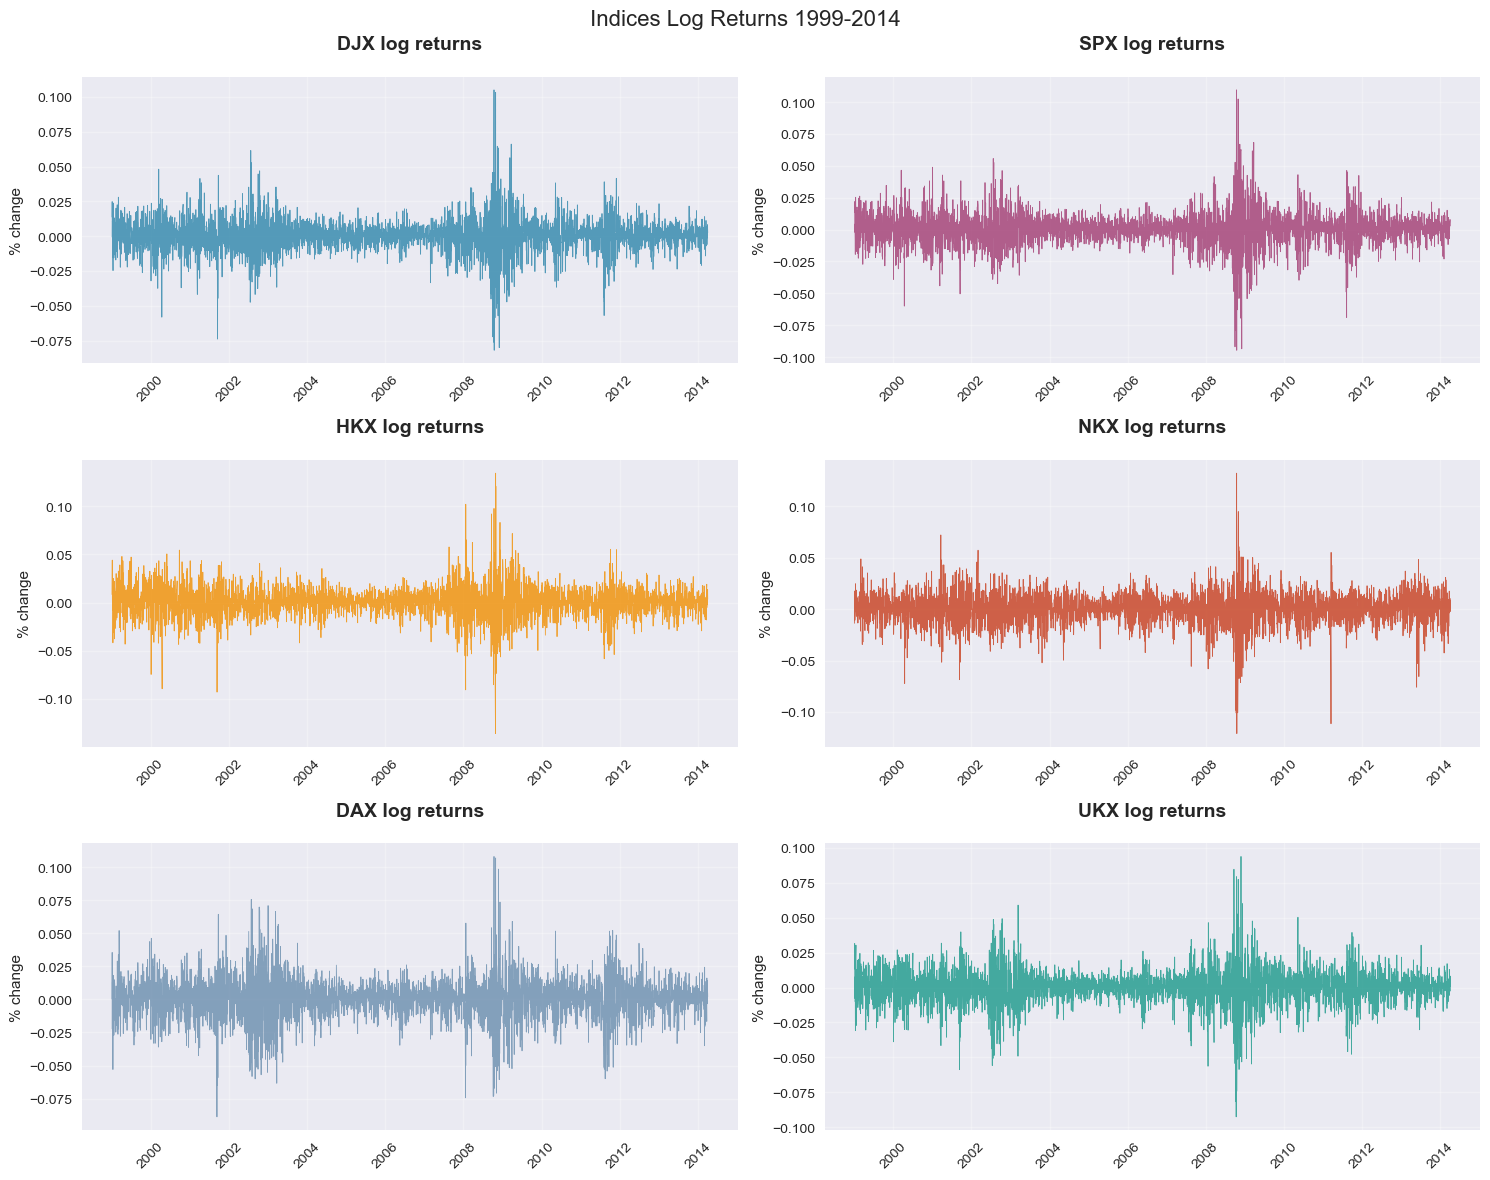

In [184]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
axes = axes.flatten()

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#1B998B']

for idx, column in enumerate(indices.loc[:,'DJX_log_return':].columns):
    axes[idx].plot(
        indices['Date'],
        indices[column], 
        color=colors[idx],
        linewidth=0.6,
        alpha=0.8
    )

    axes[idx].set_title(
        f"{column[:3]} log returns",
        fontsize=14, 
        fontweight='bold', 
        pad=20
    )
    axes[idx].set_ylabel('% change')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Indices Log Returns 1999-2014', fontsize=16)
plt.tight_layout()
plt.show()

# Question 2


Text(0.5, 0, 'Number of seconds between trades')

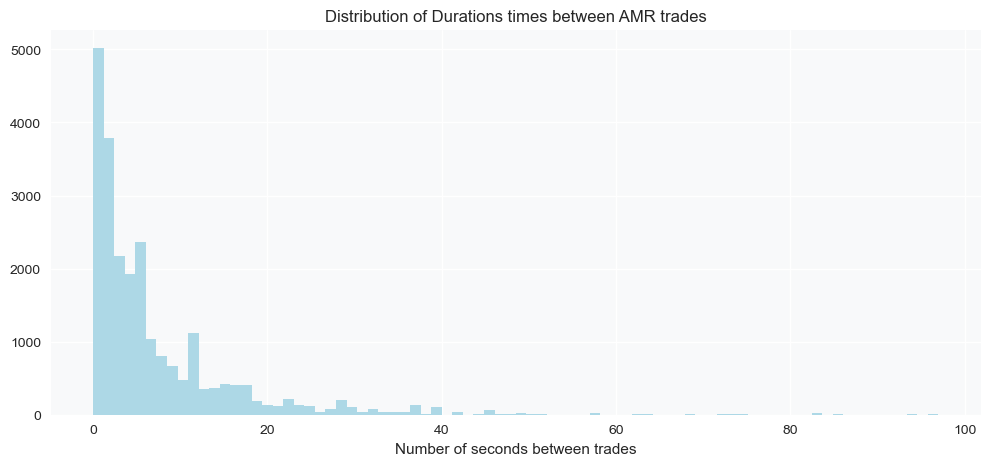

In [245]:
amr = pd.read_csv('/Users/mikhailkozyrev/Downloads/amr.csv')

plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

amr['u'].hist(bins=80, color='lightblue', ax=ax)
ax.set_facecolor('#f8f9fa')

ax.set_title('Distribution of Durations times between AMR trades')
ax.set_xlabel('Number of seconds between trades')


# Question 3

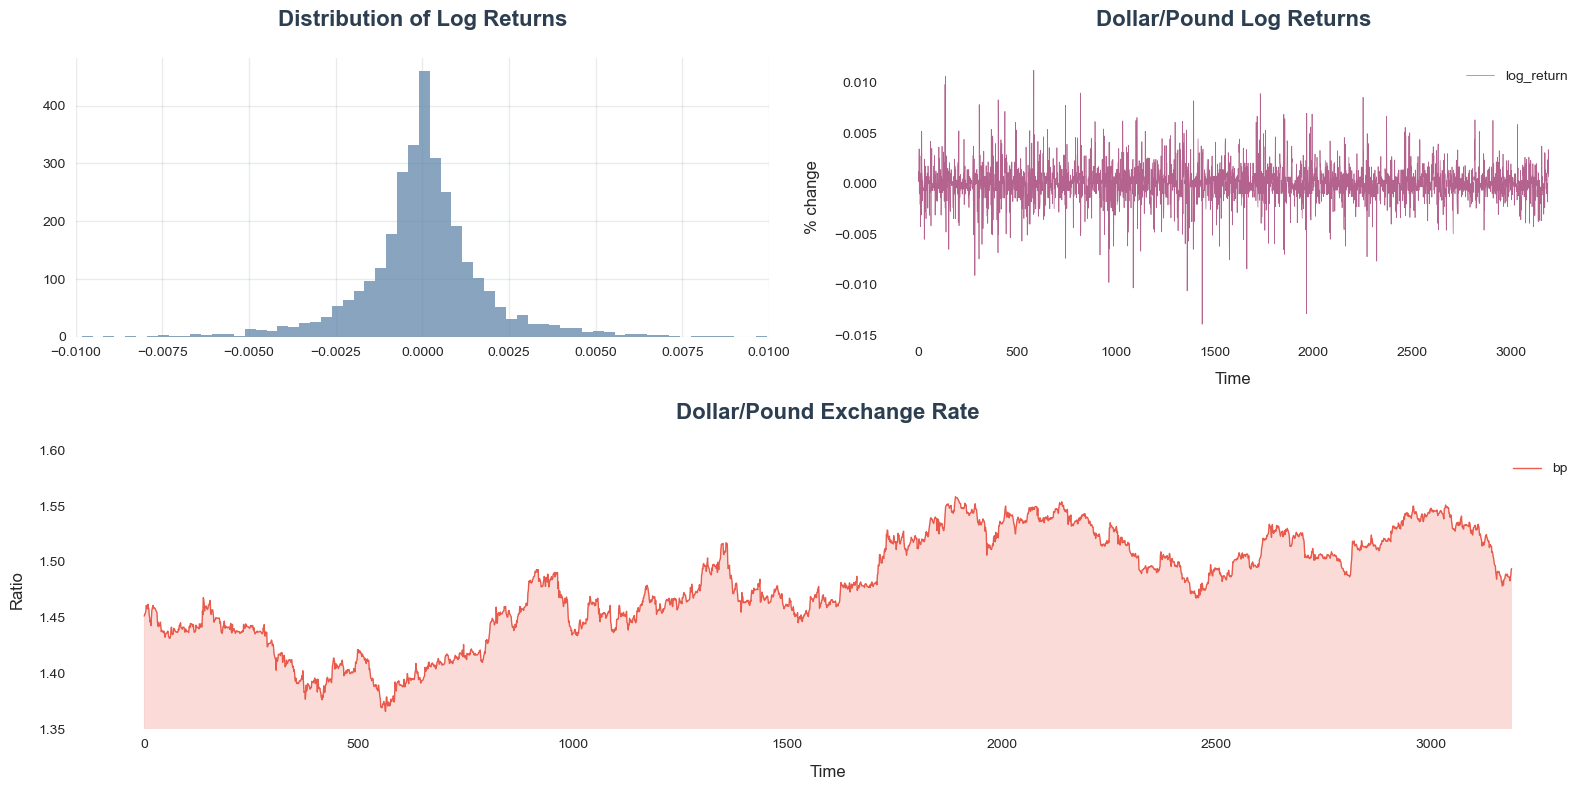

In [306]:
hour = pd.read_csv('/Users/mikhailkozyrev/Downloads/hour_fe.csv')
hour['log_return'] = np.log(hour['bp']) - np.log(hour['bp'].shift(1))

fig = plt.figure(figsize=(16, 8), facecolor='white')

axes = [plt.subplot(2,1,2), plt.subplot(2,2,2), plt.subplot(2,2,1)]

hour.plot(y='bp', color='#e74c3c', linewidth=1, alpha=0.9, ax=axes[0])
axes[0].fill_between(hour.index, hour['bp'], alpha=0.2, color='#e74c3c')
axes[0].set_title('Dollar/Pound Exchange Rate\n', fontsize=16, fontweight='bold', color='#2c3e50')
axes[0].set_xlabel('Time', fontsize=12, labelpad=10)
axes[0].set_ylabel('Ratio', fontsize=12, labelpad=10)
axes[0].set_facecolor('white')
axes[0].set_ylim(1.35,1.6)

hour.plot(y='log_return', color='#A23B72', linewidth=0.5, alpha=0.8, ax=axes[1])
axes[1].set_title('Dollar/Pound Log Returns\n', fontsize=16, fontweight='bold', color='#2c3e50')
axes[1].set_xlabel('Time', fontsize=12, labelpad=10)
axes[1].set_ylabel('% change', fontsize=12, labelpad=10)
axes[1].set_facecolor('white')

hour.hist('log_return', bins=80, ax=axes[2], color='#6A8EAE', alpha=0.8)
axes[2].set_title('Distribution of Log Returns\n', fontsize=16, fontweight='bold', color='#2c3e50')
axes[2].set_facecolor('white')
axes[2].set_xlim(-0.01, 0.01)
axes[2].grid(True, color='#2c3e50', alpha=0.1)

plt.tight_layout()
plt.show()


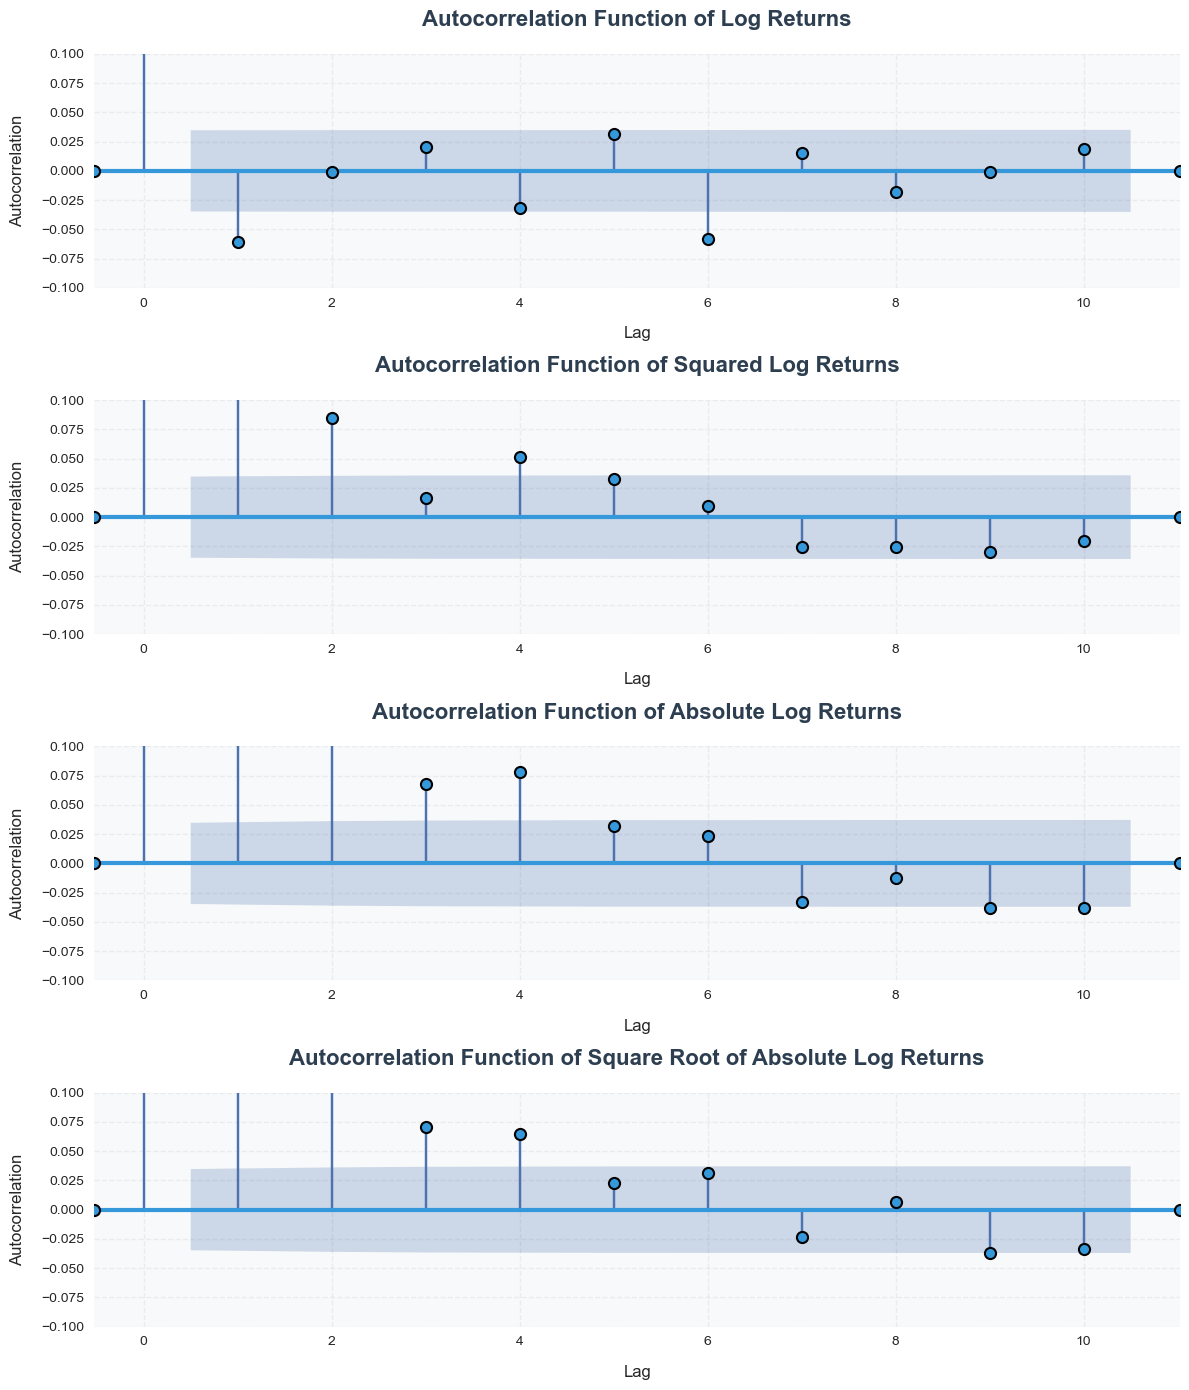

In [307]:
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 14), facecolor='white')
axes = axes.flatten()

sm.graphics.tsa.plot_acf(hour['log_return'].dropna(), 
                         lags=10, 
                         ax=axes[0],
                         alpha=0.05, 
                         color='#3498DB', 
                         marker='o',
                         markersize=8,
                         markeredgecolor='black',
                         markeredgewidth=1.5,
                         linewidth=3)

axes[0].set_title('Autocorrelation Function of Log Returns', 
                 fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
axes[0].set_xlabel('Lag', fontsize=12, labelpad=12)
axes[0].set_ylabel('Autocorrelation', fontsize=12, labelpad=12)
axes[0].set_facecolor('#F8F9FA') 
axes[0].set_ylim(-0.1, 0.1)  

axes[0].spines['top'].set_visible(True)
axes[0].spines['right'].set_visible(True)
axes[0].spines['left'].set_visible(True)
axes[0].spines['bottom'].set_visible(True)
axes[0].spines['top'].set_color('#BDC3C7')
axes[0].spines['right'].set_color('#BDC3C7')
axes[0].spines['left'].set_color('#BDC3C7')
axes[0].spines['bottom'].set_color('#BDC3C7')

axes[0].grid(True, alpha=0.4, linestyle='--', color='#D5D8DC')


sm.graphics.tsa.plot_acf((hour['log_return']**2).dropna(), 
                         lags=10, 
                         ax=axes[1],
                         alpha=0.05, 
                         color='#3498DB', 
                         marker='o',
                         markersize=8,
                         markeredgecolor='black',
                         markeredgewidth=1.5,
                         linewidth=3)


axes[1].set_title('Autocorrelation Function of Squared Log Returns', 
                 fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
axes[1].set_xlabel('Lag', fontsize=12, labelpad=12)
axes[1].set_ylabel('Autocorrelation', fontsize=12, labelpad=12)
axes[1].set_facecolor('#F8F9FA') 
axes[1].set_ylim(-0.1, 0.1)  

axes[1].spines['top'].set_visible(True)
axes[1].spines['right'].set_visible(True)
axes[1].spines['left'].set_visible(True)
axes[1].spines['bottom'].set_visible(True)
axes[1].spines['top'].set_color('#BDC3C7')
axes[1].spines['right'].set_color('#BDC3C7')
axes[1].spines['left'].set_color('#BDC3C7')
axes[1].spines['bottom'].set_color('#BDC3C7')

axes[1].grid(True, alpha=0.4, linestyle='--', color='#D5D8DC')


sm.graphics.tsa.plot_acf(abs(hour['log_return']).dropna(), 
                         lags=10, 
                         ax=axes[2],
                         alpha=0.05, 
                         color='#3498DB', 
                         marker='o',
                         markersize=8,
                         markeredgecolor='black',
                         markeredgewidth=1.5,
                         linewidth=3)


axes[2].set_title('Autocorrelation Function of Absolute Log Returns', 
                 fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
axes[2].set_xlabel('Lag', fontsize=12, labelpad=12)
axes[2].set_ylabel('Autocorrelation', fontsize=12, labelpad=12)
axes[2].set_facecolor('#F8F9FA') 
axes[2].set_ylim(-0.1, 0.1)  

axes[2].spines['top'].set_visible(True)
axes[2].spines['right'].set_visible(True)
axes[2].spines['left'].set_visible(True)
axes[2].spines['bottom'].set_visible(True)
axes[2].spines['top'].set_color('#BDC3C7')
axes[2].spines['right'].set_color('#BDC3C7')
axes[2].spines['left'].set_color('#BDC3C7')
axes[2].spines['bottom'].set_color('#BDC3C7')

axes[2].grid(True, alpha=0.4, linestyle='--', color='#D5D8DC')


sm.graphics.tsa.plot_acf((abs(hour['log_return'])**0.5).dropna(), 
                         lags=10, 
                         ax=axes[3],
                         alpha=0.05, 
                         color='#3498DB', 
                         marker='o',
                         markersize=8,
                         markeredgecolor='black',
                         markeredgewidth=1.5,
                         linewidth=3)


axes[3].set_title('Autocorrelation Function of Square Root of Absolute Log Returns', 
                 fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
axes[3].set_xlabel('Lag', fontsize=12, labelpad=12)
axes[3].set_ylabel('Autocorrelation', fontsize=12, labelpad=12)
axes[3].set_facecolor('#F8F9FA') 
axes[3].set_ylim(-0.1, 0.1)  

axes[3].spines['top'].set_visible(True)
axes[3].spines['right'].set_visible(True)
axes[3].spines['left'].set_visible(True)
axes[3].spines['bottom'].set_visible(True)
axes[3].spines['top'].set_color('#BDC3C7')
axes[3].spines['right'].set_color('#BDC3C7')
axes[3].spines['left'].set_color('#BDC3C7')
axes[3].spines['bottom'].set_color('#BDC3C7')

axes[3].grid(True, alpha=0.4, linestyle='--', color='#D5D8DC')

plt.tight_layout()
plt.show()

# Question 4

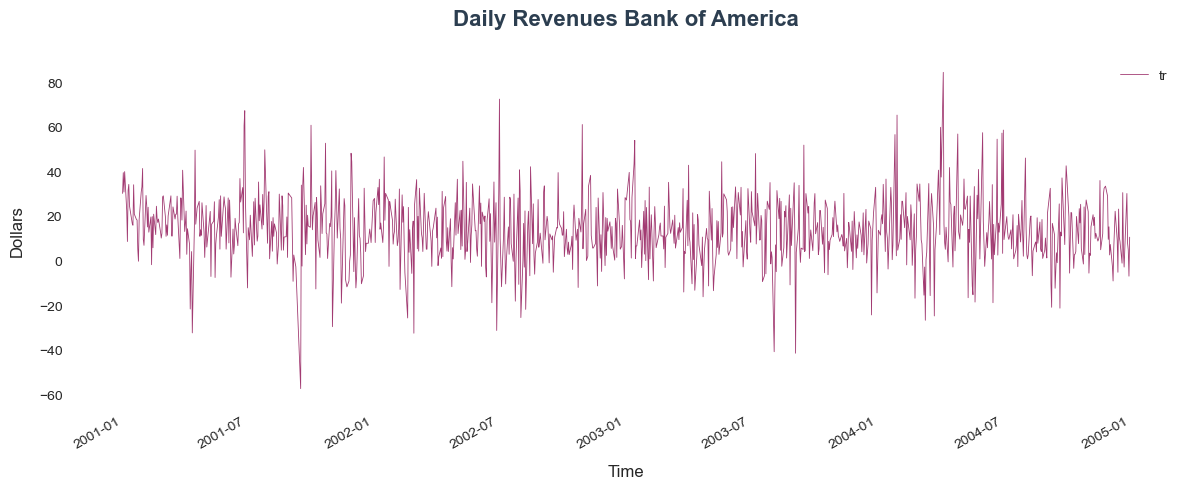

,count,mean,std,min,25%,50%,75%,max
tr,1008.0,13.9,14.9,-57.4,4.8,13.1,23.0,84.3


In [349]:
bank = pd.read_csv('/Users/mikhailkozyrev/Downloads/bankamerica.csv')
bank['caldate'] = pd.to_datetime(bank['caldate'], format="%d-%b-%y")
bank = bank.set_index('caldate')

pd.DataFrame(bank['tr'].describe().round(2))

fig, ax = plt.subplots(figsize=(12,5))
bank.plot(y='tr', color='#A23B72', linewidth=0.6, ax=ax)
ax.set_title('Daily Revenues Bank of America\n', fontsize=16, fontweight='bold', color='#2c3e50')
ax.set_xlabel('Time', fontsize=12, labelpad=10)
ax.set_ylabel('Dollars', fontsize=12, labelpad=10)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

pd.DataFrame(bank['tr'].describe().round(1)).transpose()

In [348]:
quarterly_stats = bank['tr'].resample('QE').agg(['mean', 'std', 'min', 'max']).round(2)
quarterly_stats

,mean,std,min,max
caldate,,,,
2001-03-31,20.40,9.98,-1.86,41.25
2001-06-30,15.90,15.68,-32.42,67.15
2001-09-30,14.61,15.96,-57.39,49.63
2001-12-31,13.93,17.75,-29.63,60.64
2002-03-31,14.69,14.22,-32.55,46.42
2002-06-30,12.61,14.06,-31.33,44.49
2002-09-30,11.85,16.75,-25.55,72.33
2002-12-31,11.80,12.40,-12.07,60.95
2003-03-31,14.68,12.78,-14.10,53.85


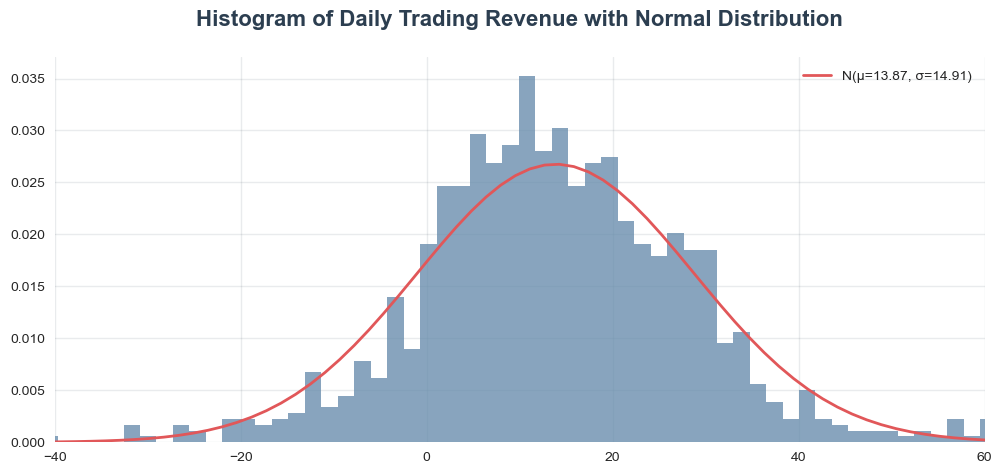

In [357]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(12,5))

bank.hist('tr', bins=80, ax=ax, color='#6A8EAE', alpha=0.8, density=True) 

mu = bank['tr'].mean()
sigma = bank['tr'].std()

xmin, xmax = ax.get_xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, sigma)

ax.plot(x, p, linewidth=2, color='#E15759', label=f'N(μ={mu:.2f}, σ={sigma:.2f})')

ax.legend()

ax.set_title('Histogram of Daily Trading Revenue with Normal Distribution\n', 
             fontsize=16, fontweight='bold', color='#2c3e50')
ax.set_facecolor('white')
ax.set_xlim(-40, 60)
ax.grid(True, color='#2c3e50', alpha=0.1)

plt.show()

In [364]:
from scipy.stats import shapiro

statistic, pvalue = shapiro(bank['tr'])
print(f"Shapiro-Wilk test: statistic={round(statistic, 3)}, p-value={round(pvalue, 10)}")
print("Reject H0 hypothesis about belonging to Normal distribution")

Shapiro-Wilk test: statistic=0.98, p-value=2e-10
Reject H0 hypothesis about belonging to Normal distribution


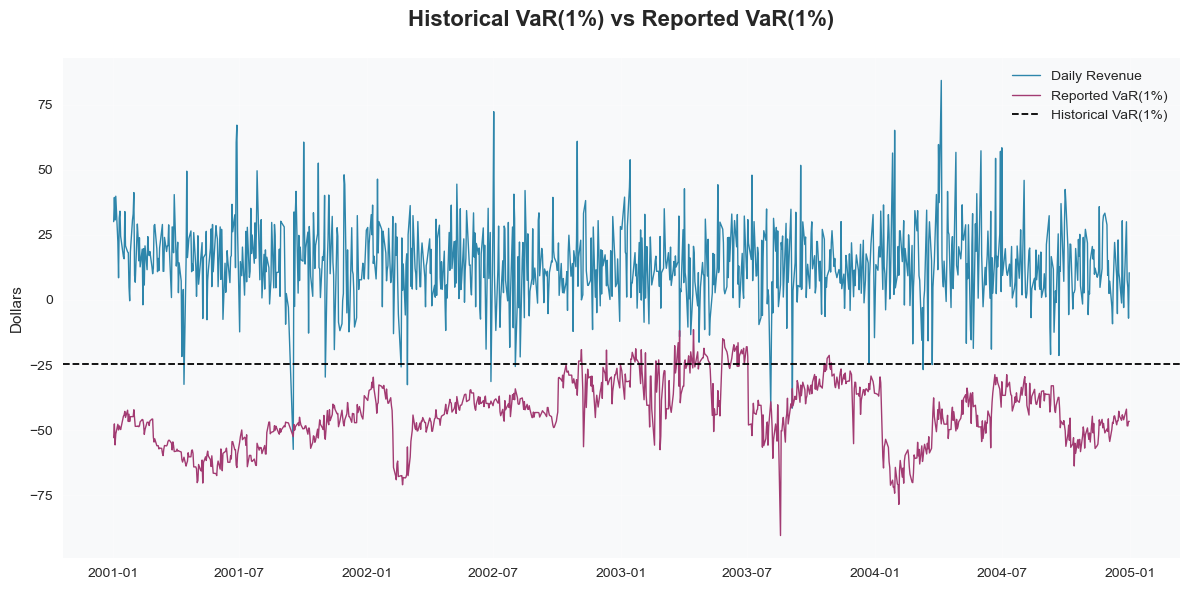

In [381]:
historical_var_1 = np.percentile(bank['tr'], 1)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(bank.index, bank['tr'], label='Daily Revenue', color='#2E86AB', linewidth=1)
ax.plot(bank.index, bank['var'], label='Reported VaR(1%)', color='#A23B72', linewidth=1)
ax.axhline(historical_var_1, linestyle = '--', label='Historical VaR(1%)', color='black', linewidth=1.3)

ax.set_title('Historical VaR(1%) vs Reported VaR(1%)\n', fontsize=16, fontweight='bold')
ax.set_ylabel('Dollars')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()



In [384]:
weekly_bank_data = bank.resample('W').sum()
weekly_bank_data

,tr,var
caldate,,
2001-01-07,140.033200,-207.6544
2001-01-14,120.954310,-244.8725
2001-01-21,87.143900,-176.7903
2001-01-28,59.845704,-224.4011
2001-02-04,121.260680,-225.9526
...,...,...
2004-12-05,63.190000,-252.4642
2004-12-12,30.350000,-233.3571
2004-12-19,45.910000,-228.2071


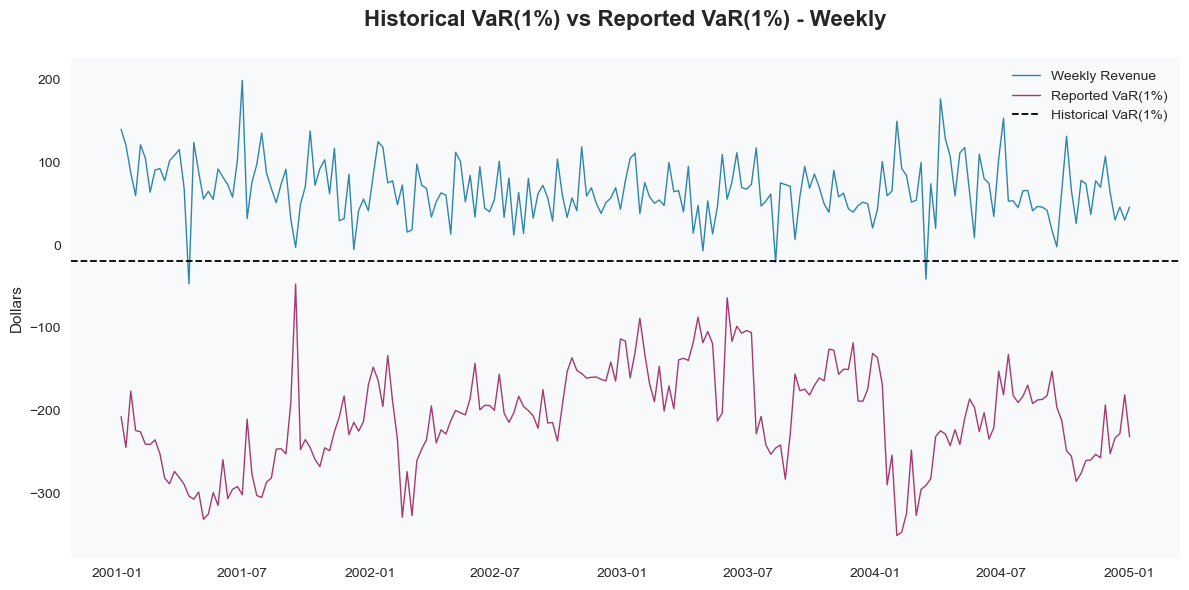

In [386]:
historical_var_1_weekly = np.percentile(weekly_bank_data['tr'], 1)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(weekly_bank_data.index, weekly_bank_data['tr'], label='Weekly Revenue', color='#2E86AB', linewidth=1)
ax.plot(weekly_bank_data.index, weekly_bank_data['var'], label='Reported VaR(1%)', color='#A23B72', linewidth=1)
ax.axhline(historical_var_1_weekly, linestyle = '--', label='Historical VaR(1%)', color='black', linewidth=1.3)

ax.set_title('Historical VaR(1%) vs Reported VaR(1%) - Weekly\n', fontsize=16, fontweight='bold')
ax.set_ylabel('Dollars')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()


# Question 5

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
integration = pd.read_csv('/Users/mikhailkozyrev/Downloads/integration.csv')
integration['Date'] = pd.to_datetime(integration['Date'], format='%d/%m/%Y')
integration = integration.set_index(integration['Date']).drop('Date', axis=1)

for column in integration.columns:
    integration[column + '_%_log_return'] = 100 * (np.log(integration[column]) - np.log(integration[column].shift(1)))
    
integration

,US,China,HK,Japan,South Korea,Taiwan,Indonesia,Thailand,Malaysia,Philippines,...,China_%_log_return,HK_%_log_return,Japan_%_log_return,South Korea_%_log_return,Taiwan_%_log_return,Indonesia_%_log_return,Thailand_%_log_return,Malaysia_%_log_return,Philippines_%_log_return,Singapore_%_log_return
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-01,740.74,110.5054,1739.149,12.68708,0.77471,252.2533,0.26976,32.43885,490.2812,120.5536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-02,737.01,110.7980,1707.084,12.68708,0.77471,252.2533,0.27004,31.34778,487.5510,119.9422,...,0.264434,-1.860926,0.000000,0.000000,0.000000,0.103742,-3.421333,-0.558420,-0.508451,0.000000
1997-01-03,748.03,108.4093,1709.519,12.68708,0.77712,252.2533,0.27358,30.74253,488.0896,120.5959,...,-2.179484,0.142539,0.000000,0.310601,0.000000,1.302399,-1.949641,0.110410,0.543533,0.050913
1997-01-06,747.65,105.6044,1737.728,12.79361,0.74681,249.0177,0.27687,30.83223,493.9395,121.2470,...,-2.621384,1.636647,0.836167,-3.978398,-1.290976,1.195400,0.291353,1.191404,0.538450,0.997417
1997-01-07,753.23,108.2447,1734.162,12.58815,0.72623,250.2191,0.27958,32.02929,495.4955,121.5932,...,2.469437,-0.205421,-1.618993,-2.794403,0.481296,0.974040,3.809023,0.314523,0.285126,0.374095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,2048.04,433.5948,2550.344,12.24104,1.65042,255.7056,0.34913,38.72449,399.5137,156.4099,...,0.585806,-0.203530,0.675997,0.529142,2.796119,0.738838,-0.231317,0.013943,-0.002238,0.337080
2016-05-24,2076.06,430.5784,2552.672,12.06019,1.63136,254.0837,0.34509,38.71731,395.8705,157.4000,...,-0.698104,0.091240,-1.488430,-1.161578,-0.636304,-1.163909,-0.018543,-0.916092,0.631021,-0.844488
2016-05-25,2090.54,429.5153,2622.620,12.18474,1.65764,257.8923,0.35034,39.16356,397.6981,159.6738,...,-0.247206,2.703316,1.027440,1.598088,1.487832,1.509886,1.145994,0.460604,1.434265,0.783933


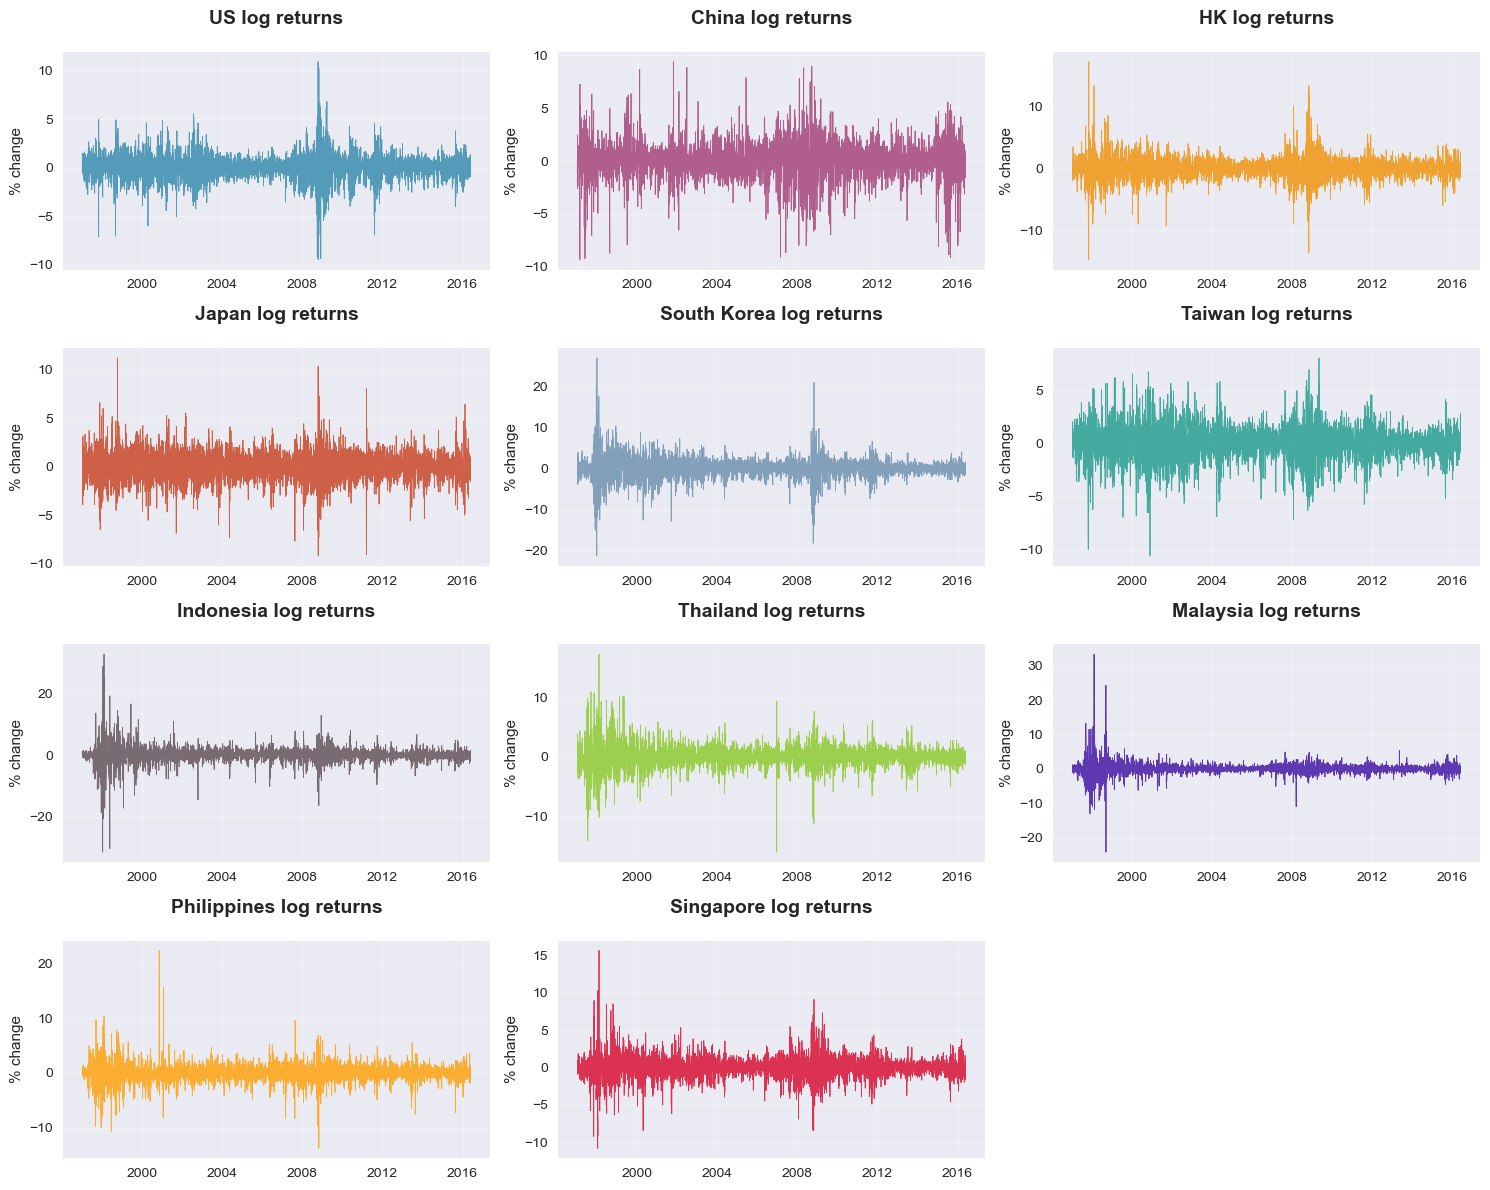

In [33]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,12))
axes = axes.flatten()

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#1B998B',
          '#5C4B51', '#8AC926', '#3A0CA3', '#FF9E00', '#D90429']

for idx, column in enumerate(integration.loc[:,'US_%_log_return':].columns):
    axes[idx].plot(
        integration.index,
          integration[column], 
        color=colors[idx],
        linewidth=0.6,
        alpha=0.8
    )

    axes[idx].set_title(
        f"{column.split('_')[0]} log returns",
        fontsize=14, 
        fontweight='bold', 
        pad=20
    )
    axes[idx].set_ylabel('% change')
    axes[idx].grid(True, alpha=0.3)
    
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [36]:
asia = integration.loc[:,'China_%_log_return':]
asia['std_cross_market_returns'] = (asia.sub(asia.mean()).pow(2).sum(axis=1)/10).pow(0.5)
asia = asia.drop(index='1997-01-01')
asia['var_cross_market_returns'] = asia['std_cross_market_returns'].pow(2)
asia

,China_%_log_return,HK_%_log_return,Japan_%_log_return,South Korea_%_log_return,Taiwan_%_log_return,Indonesia_%_log_return,Thailand_%_log_return,Malaysia_%_log_return,Philippines_%_log_return,Singapore_%_log_return,std_cross_market_returns,var_cross_market_returns
Date,,,,,,,,,,,,
1997-01-02,0.264434,-1.860926,0.000000,0.000000,0.000000,0.103742,-3.421333,-0.558420,-0.508451,0.000000,1.259473,1.586272
1997-01-03,-2.179484,0.142539,0.000000,0.310601,0.000000,1.302399,-1.949641,0.110410,0.543533,0.050913,1.038089,1.077628
1997-01-06,-2.621384,1.636647,0.836167,-3.978398,-1.290976,1.195400,0.291353,1.191404,0.538450,0.997417,1.793732,3.217476
1997-01-07,2.469437,-0.205421,-1.618993,-2.794403,0.481296,0.974040,3.809023,0.314523,0.285126,0.374095,1.802437,3.248778
1997-01-08,-0.191694,0.254899,-1.689982,1.693035,2.045994,0.321394,1.372430,0.525724,0.207773,0.708682,1.129106,1.274880
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,0.585806,-0.203530,0.675997,0.529142,2.796119,0.738838,-0.231317,0.013943,-0.002238,0.337080,0.979653,0.959721
2016-05-24,-0.698104,0.091240,-1.488430,-1.161578,-0.636304,-1.163909,-0.018543,-0.916092,0.631021,-0.844488,0.886111,0.785193
2016-05-25,-0.247206,2.703316,1.027440,1.598088,1.487832,1.509886,1.145994,0.460604,1.434265,0.783933,1.397982,1.954354


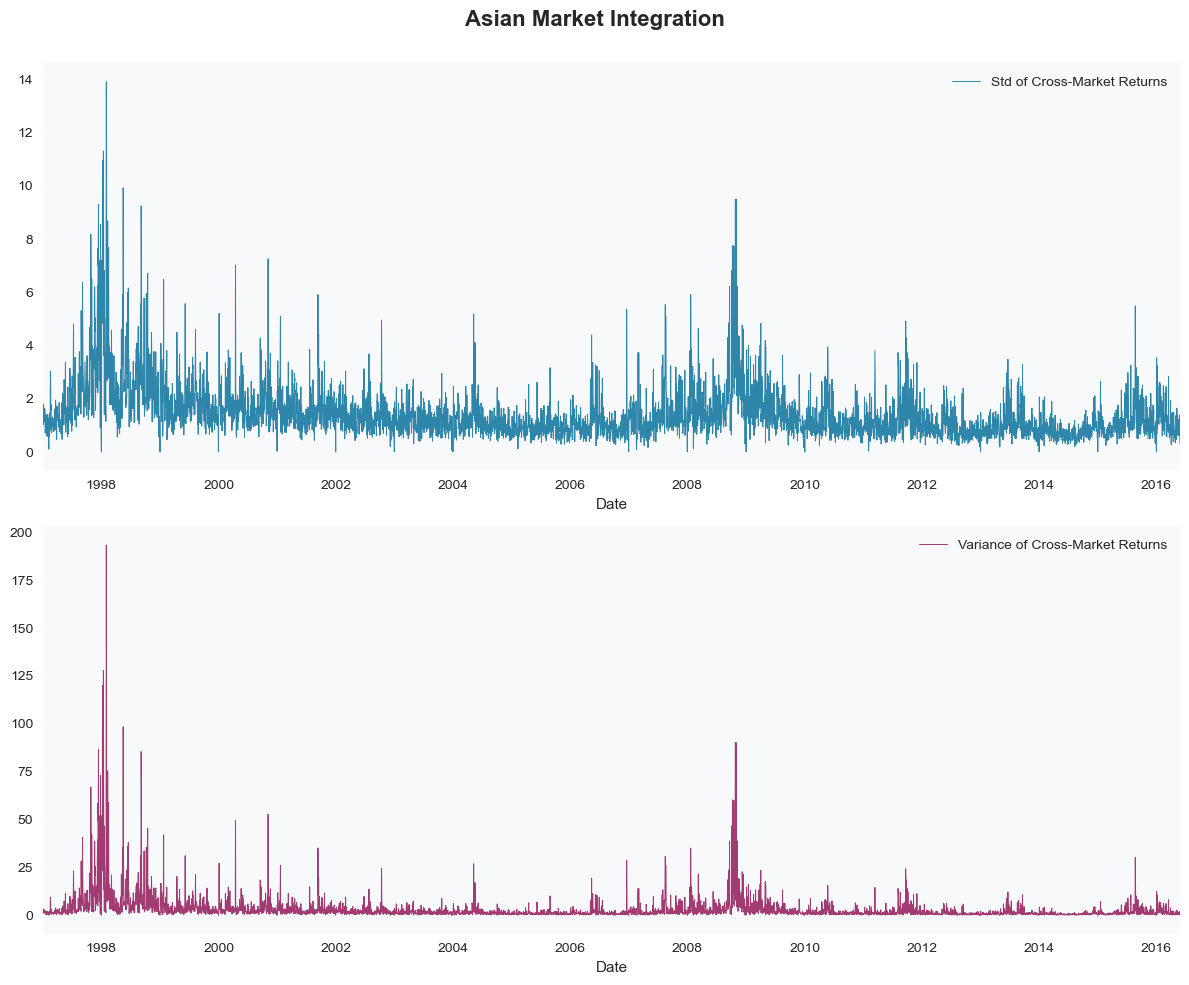

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
axes = axes.flatten()
asia.plot(y='std_cross_market_returns', label='Std of Cross-Market Returns', color='#2E86AB', ax=axes[0], linewidth=0.7)
asia.plot(y='var_cross_market_returns', label='Variance of Cross-Market Returns', color='#A23B72', ax=axes[1], linewidth=0.7)

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')
axes[1].set_facecolor('#f8f9fa')

plt.suptitle('Asian Market Integration\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()




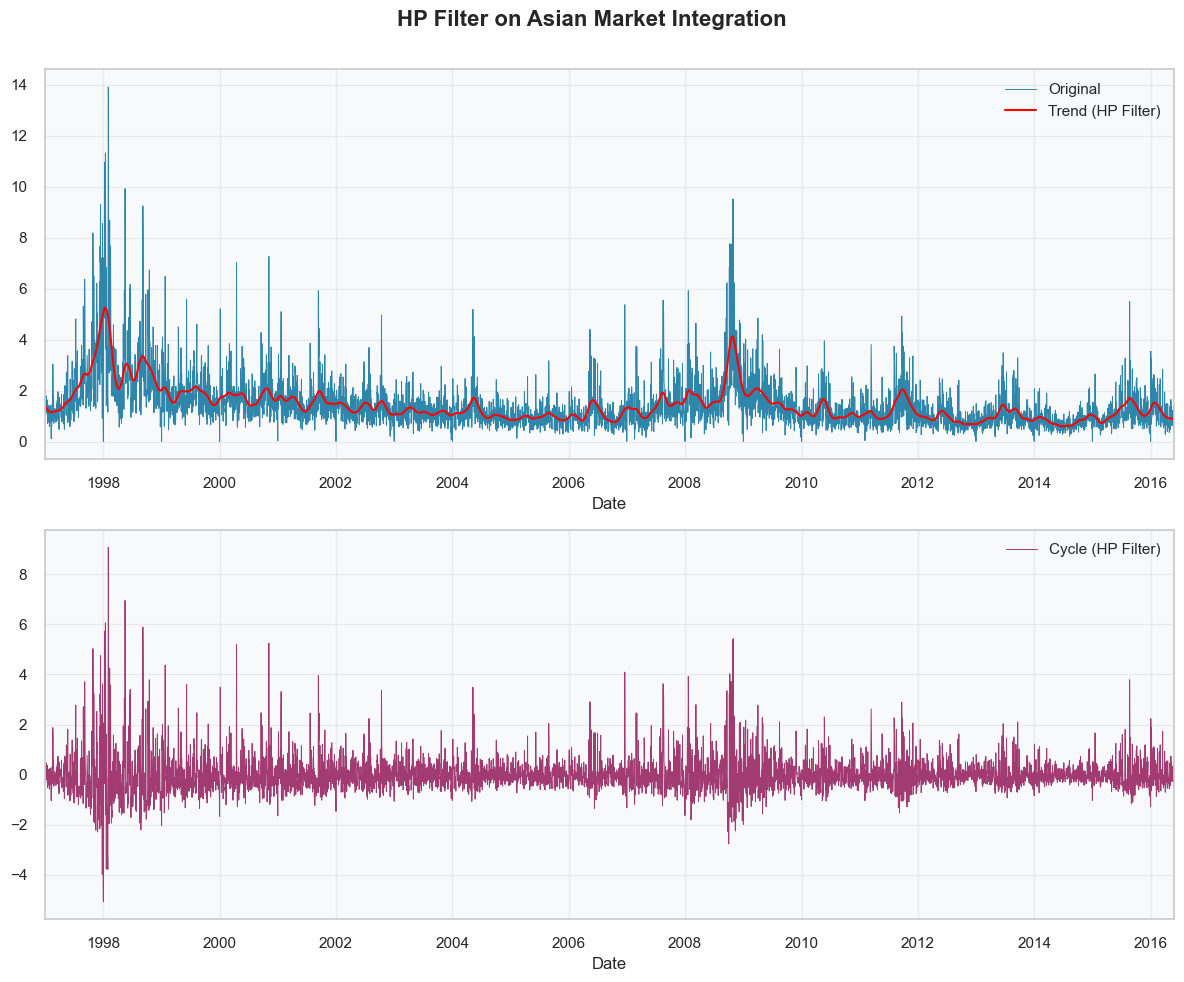

In [73]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(asia['std_cross_market_returns'], lamb=16000)

asia['trend'] = trend
asia['cycle'] = cycle

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
axes = axes.flatten()
asia.plot(y='std_cross_market_returns', label='Original', color='#2E86AB', ax=axes[0], linewidth=0.7)
asia.plot(y='trend', label='Trend (HP Filter)', color='red', ax=axes[0], linewidth=1.5)
asia.plot(y='cycle', label='Cycle (HP Filter)', color='#A23B72', ax=axes[1], linewidth=0.7)
axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')
axes[1].set_facecolor('#f8f9fa')
plt.suptitle('HP Filter on Asian Market Integration\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [56]:
asia_us = integration.loc[:,'US_%_log_return':]
asia_us['std_cross_market_returns'] = (asia_us.sub(asia_us.mean()).pow(2).sum(axis=1)/11).pow(0.5)
asia_us = asia_us.drop(index='1997-01-01')
asia_us['var_cross_market_returns'] = asia_us['std_cross_market_returns'].pow(2)
asia_us

,US_%_log_return,China_%_log_return,HK_%_log_return,Japan_%_log_return,South Korea_%_log_return,Taiwan_%_log_return,Indonesia_%_log_return,Thailand_%_log_return,Malaysia_%_log_return,Philippines_%_log_return,Singapore_%_log_return,std_cross_market_returns,var_cross_market_returns
Date,,,,,,,,,,,,,
1997-01-02,-0.504823,0.264434,-1.860926,0.000000,0.000000,0.000000,0.103742,-3.421333,-0.558420,-0.508451,0.000000,1.211261,1.467153
1997-01-03,1.484162,-2.179484,0.142539,0.000000,0.310601,0.000000,1.302399,-1.949641,0.110410,0.543533,0.050913,1.083706,1.174419
1997-01-06,-0.050813,-2.621384,1.636647,0.836167,-3.978398,-1.290976,1.195400,0.291353,1.191404,0.538450,0.997417,1.710392,2.925440
1997-01-07,0.743567,2.469437,-0.205421,-1.618993,-2.794403,0.481296,0.974040,3.809023,0.314523,0.285126,0.374095,1.732329,3.000965
1997-01-08,-0.641967,-0.191694,0.254899,-1.689982,1.693035,2.045994,0.321394,1.372430,0.525724,0.207773,0.708682,1.094933,1.198877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,-0.208762,0.585806,-0.203530,0.675997,0.529142,2.796119,0.738838,-0.231317,0.013943,-0.002238,0.337080,0.936617,0.877251
2016-05-24,1.358863,-0.698104,0.091240,-1.488430,-1.161578,-0.636304,-1.163909,-0.018543,-0.916092,0.631021,-0.844488,0.936297,0.876651
2016-05-25,0.695054,-0.247206,2.703316,1.027440,1.598088,1.487832,1.509886,1.145994,0.460604,1.434265,0.783933,1.348352,1.818052


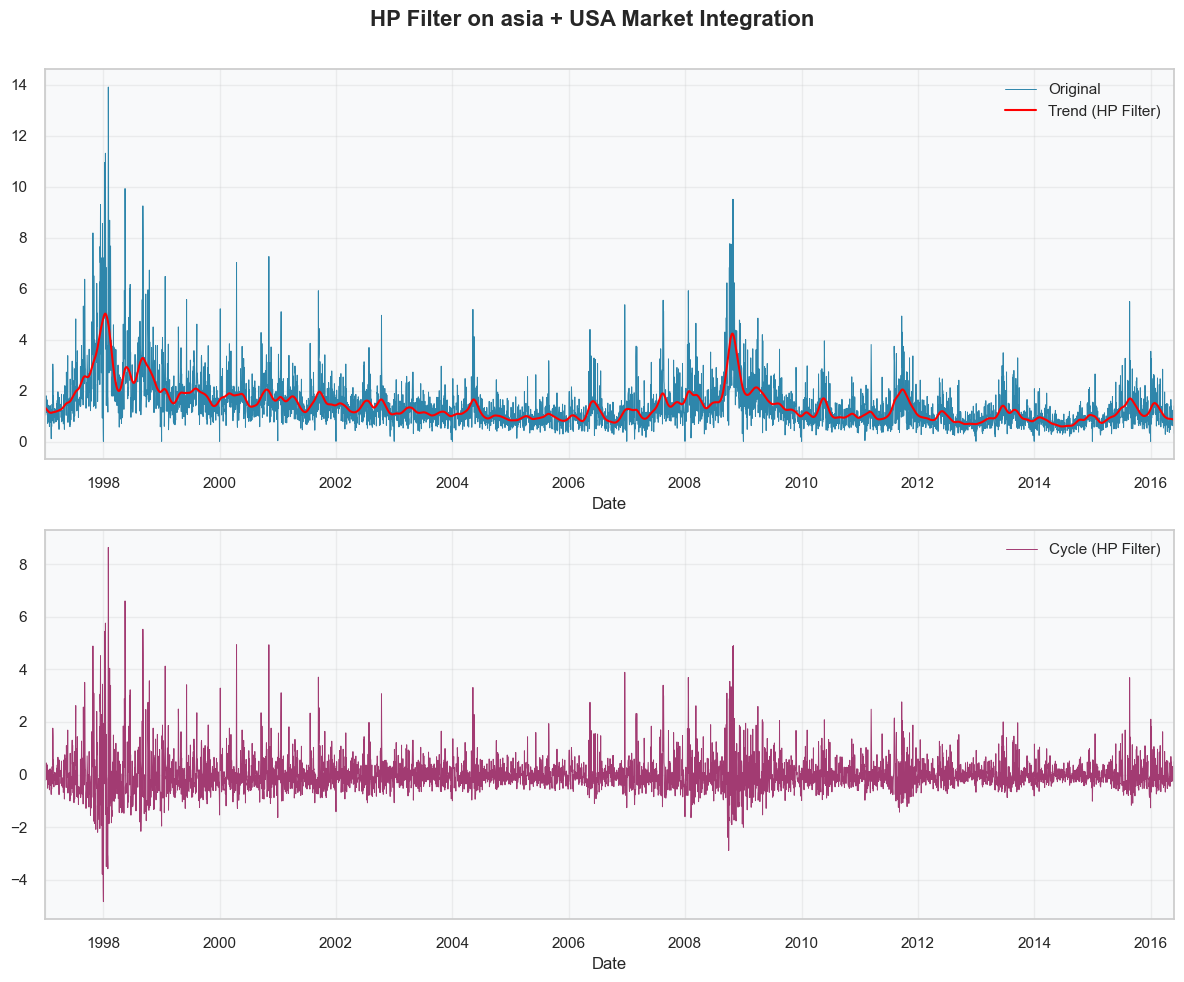

In [72]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(asia_us['std_cross_market_returns'], lamb=16000)

asia_us['trend'] = trend
asia_us['cycle'] = cycle

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
axes = axes.flatten()
asia.plot(y='std_cross_market_returns', label='Original', color='#2E86AB', ax=axes[0], linewidth=0.7)
asia_us.plot(y='trend', label='Trend (HP Filter)', color='red', ax=axes[0], linewidth=1.5)
asia_us.plot(y='cycle', label='Cycle (HP Filter)', color='#A23B72', ax=axes[1], linewidth=0.7)
axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')
axes[1].set_facecolor('#f8f9fa')
plt.suptitle('HP Filter on asia + USA Market Integration\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

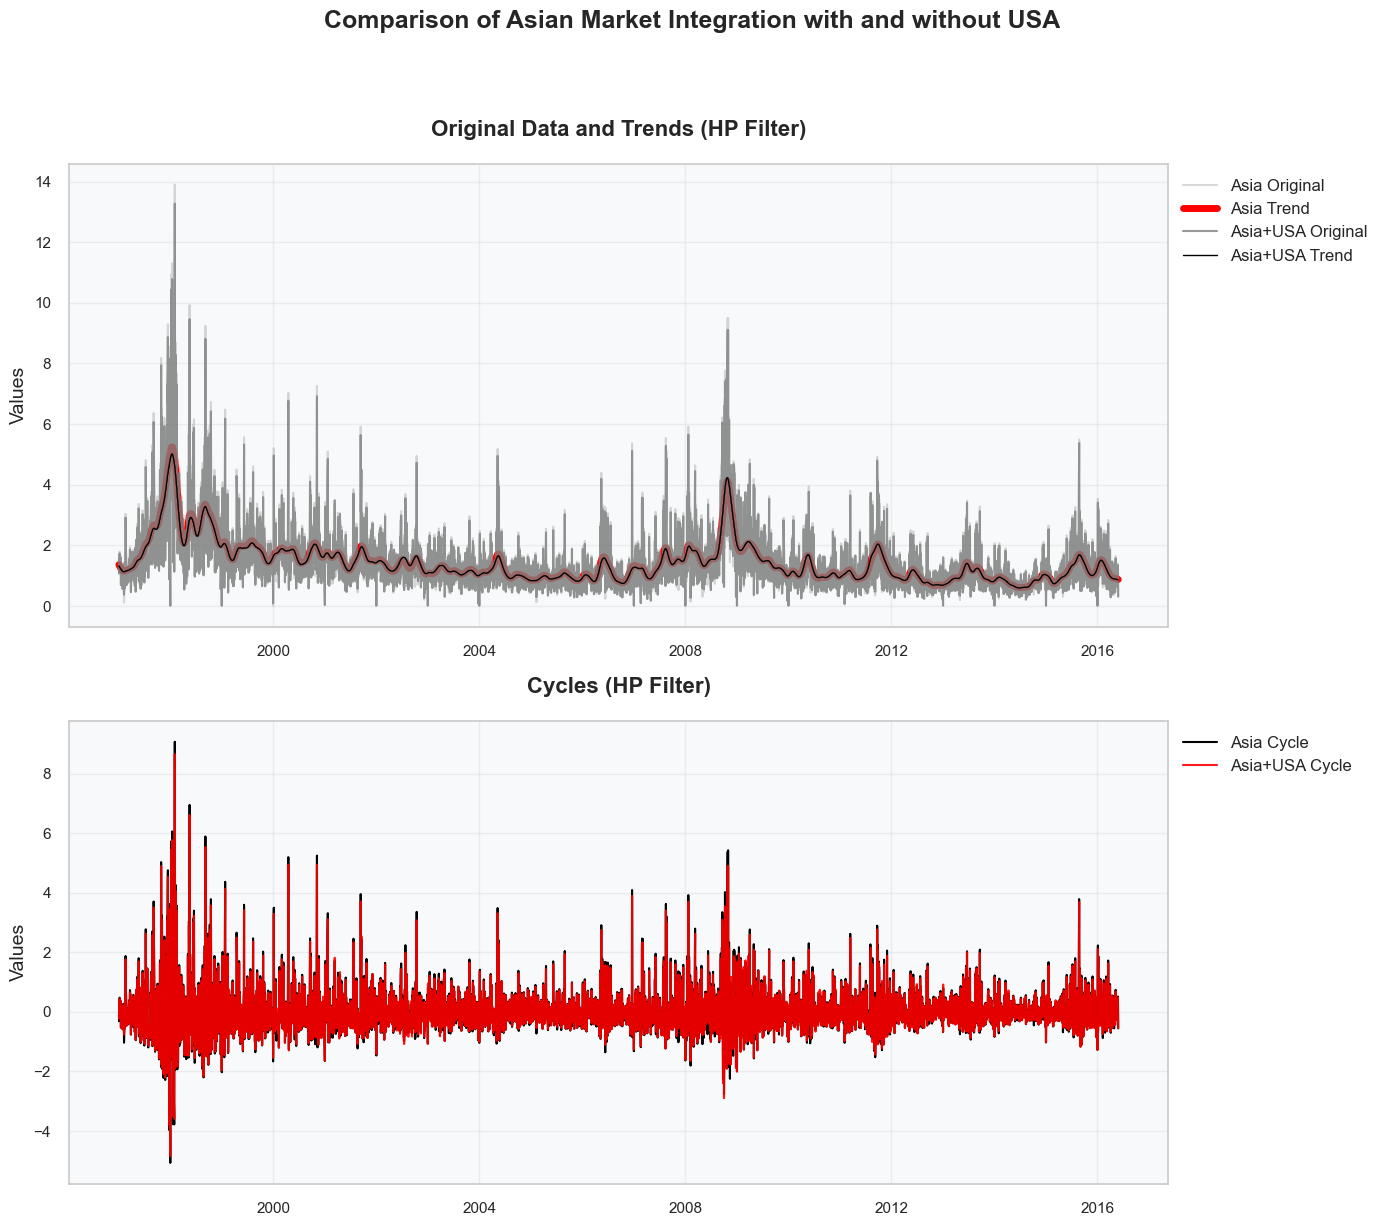

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


colors = {
    'asia_original': '#1f77b4',
    'asia_trend': '#ff7f0e',    
    'asia_us_original': '#2ca02c',
    'asia_us_trend': '#d62728',  
    'asia_cycle': '#9467bd',
    'asia_us_cycle': '#8c564b'    
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

axes[0].plot(asia.index, asia['std_cross_market_returns'], label='Asia Original', color='gray', linewidth=1.5, alpha=0.3)
axes[0].plot(asia.index, asia['trend'], label='Asia Trend', color='red', linewidth=5, alpha=1)
axes[0].plot(asia_us.index, asia_us['std_cross_market_returns'], label='Asia+USA Original', color='gray', linewidth=1.5, alpha=0.8)
axes[0].plot(asia_us.index, asia_us['trend'], label='Asia+USA Trend', color='black', linewidth=1, alpha=1)
axes[0].set_title('Original Data and Trends (HP Filter)', fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel('Values', fontsize=14)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

axes[1].plot(asia.index, asia['cycle'], label='Asia Cycle', color='black', linewidth=1.5, alpha=1)
axes[1].plot(asia_us.index, asia_us['cycle'], label='Asia+USA Cycle', color='red', linewidth=1.5, alpha=0.9)
axes[1].set_title('Cycles (HP Filter)', fontsize=16, fontweight='bold', pad=20)
axes[1].set_ylabel('Values', fontsize=14)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

plt.suptitle('Comparison of Asian Market Integration with and without USA\n', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [105]:
asia_us['range'] = asia_us.max(axis=1) - asia_us.min(axis=1)
asia_us

,US_%_log_return,China_%_log_return,HK_%_log_return,Japan_%_log_return,South Korea_%_log_return,Taiwan_%_log_return,Indonesia_%_log_return,Thailand_%_log_return,Malaysia_%_log_return,Philippines_%_log_return,Singapore_%_log_return,std_cross_market_returns,var_cross_market_returns,trend,cycle,range
Date,,,,,,,,,,,,,,,,
1997-01-02,-0.504823,0.264434,-1.860926,0.000000,0.000000,0.000000,0.103742,-3.421333,-0.558420,-0.508451,0.000000,1.211261,1.467153,1.321141,-0.109881,4.888485
1997-01-03,1.484162,-2.179484,0.142539,0.000000,0.310601,0.000000,1.302399,-1.949641,0.110410,0.543533,0.050913,1.083706,1.174419,1.310104,-0.226398,3.663647
1997-01-06,-0.050813,-2.621384,1.636647,0.836167,-3.978398,-1.290976,1.195400,0.291353,1.191404,0.538450,0.997417,1.710392,2.925440,1.299060,0.411331,6.903838
1997-01-07,0.743567,2.469437,-0.205421,-1.618993,-2.794403,0.481296,0.974040,3.809023,0.314523,0.285126,0.374095,1.732329,3.000965,1.287989,0.444341,6.603426
1997-01-08,-0.641967,-0.191694,0.254899,-1.689982,1.693035,2.045994,0.321394,1.372430,0.525724,0.207773,0.708682,1.094933,1.198877,1.276894,-0.181961,3.735977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,-0.208762,0.585806,-0.203530,0.675997,0.529142,2.796119,0.738838,-0.231317,0.013943,-0.002238,0.337080,0.936617,0.877251,0.871088,0.065529,3.027436
2016-05-24,1.358863,-0.698104,0.091240,-1.488430,-1.161578,-0.636304,-1.163909,-0.018543,-0.916092,0.631021,-0.844488,0.936297,0.876651,0.868066,0.068230,2.847292
2016-05-25,0.695054,-0.247206,2.703316,1.027440,1.598088,1.487832,1.509886,1.145994,0.460604,1.434265,0.783933,1.348352,1.818052,0.864931,0.483421,2.950522


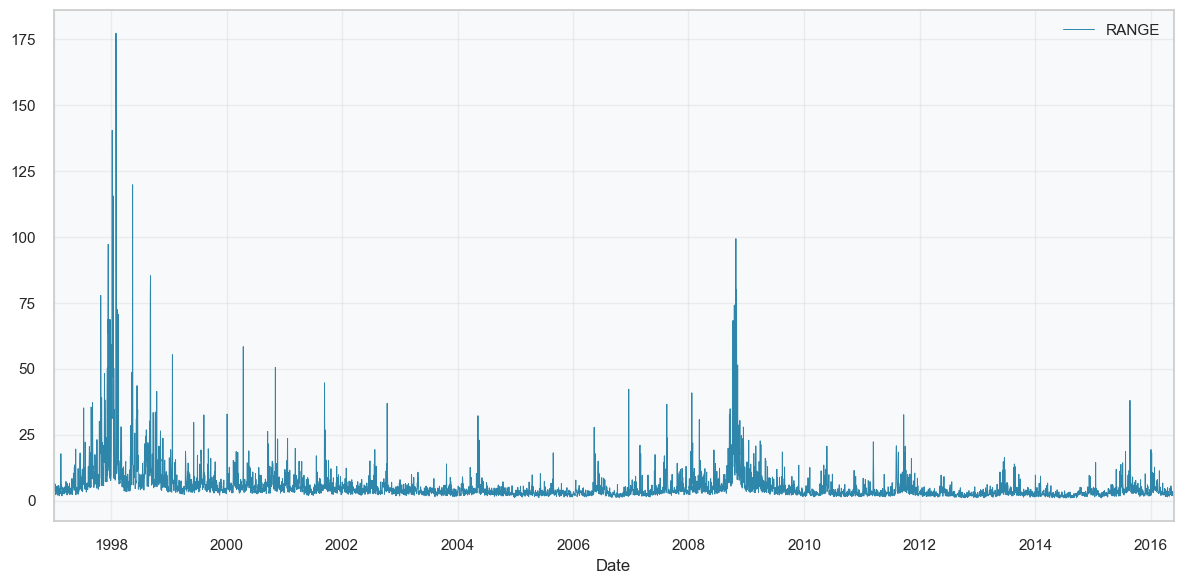

In [113]:
fig, ax = plt.subplots(figsize=(12,6))

asia_us.plot(y='range', label='RANGE', color='#2E86AB', ax=ax, linewidth=0.7)


ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

